**TUGAS KELOMPOK PRAKTIKUM 4 DATA MINING**

**Kelompok 5**\
**Anggota Kelompok :**
1. Tri Murniya Ningsih
2. Yogy Sa’e Tama
3. Putri Durrotul Shopia
4. Nazwa Nabilla
5. Ramadhita Atifa Hendri
6. Claudhea Angeliani






**DESKRIPSI TUGAS:**

Lakukan klasterisasi menggunakan metode
K-Means pada dataset 6. Sebelum pada tahap implementasi K-Means Clustering,
lakukan langkah-langkah data understanding and preparation terlebih dahulu untuk
mengetahui sekaligus meningkatkan kualitas data!

**DESKRIPSI DATASET:**

**1. Deskripsi Umum:**

Dataset Spotify Tracks ini mencakup informasi rinci tentang berbagai lagu yang tersedia di platform Spotify. Setiap entri dalam dataset mencakup atribut-atribut seperti ID lagu, nama lagu, artis yang memperforma lagu, popularitas lagu, informasi album, dan atribut musik seperti danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time signature, dan durasi lagu dalam milidetik. Informasi ini memberikan gambaran lengkap tentang karakteristik musik yang dapat digunakan untuk analisis dan pemahaman pola di dalam dataset.

Dataset ini sangat relevan untuk penerapan algoritma K-Means Clustering dalam konteks analisis musik. Melalui atribut musik yang diberikan, seperti danceability, energy, valence, dan lainnya, kita dapat menggunakan K-Means untuk mengelompokkan lagu-lagu dengan karakteristik musik serupa. Proses klasterisasi ini dapat memberikan wawasan mendalam tentang tren dan preferensi di dalam dataset, membantu dalam pemahaman pola musikal yang mungkin sulit dikenali secara manual.

**2. Informasi Dataset:**

- track_id : ID spotify
- track_name : nama lagu
- track_artists : nama artis yang menyanyikan lagu
- track_popularity : popularitas lagu dalam rentang 0 sampai 100 berdasarkan seberapa sering lagu diputar
- track_album_id : ID album tempat lagu
- track_album_name : nama album
- track_album_release : tanggal dari rilis album
- playlist_name : nama playlist
- playlist_id : id playlist
- playlist_genre : genre playlist
- playlist_subgenre : subgenre playlist

Atribut musik :
- danceability : menunjukkan seberapa lagu cocok untuk tarian dengan rentang 0.0 (paling tidak cocok) dan 1.0 (paling cocok)
- energy : representasi dari intensitas lagu
- key : kunci musik lagu
- loudness : tingkat kebisingan lagu
- mode : modus musik lagu yang terbagi menjadi major atau minor
- speechiness : keberadaan kata-kata di dalam lagu
- acousticness : kepercayaan apakah lagu akustik pada rentang 0.0 - 1.0
- instrumentalness : prediksi apakah lagu mengandung vokal
- liveness : deteksi keberadaan audiens dalam rekaman
- valence : tingkat positif dari lagu
- tempo : tempo keseluruhan lagu
- time_signature : tanda waktu perkiraan
- duration_ms : panjang lagu dalam milidetik


## **A. Data Understanding**

**Import Dataset**

In [ ]:
import pandas as pd

# Membaca dataset Spotify Tracks
df_spotify = pd.read_csv("/content/spotify.csv")

**Size Data**

In [ ]:
# Melihat jumlah baris dan kolom dalam dataset
size_data = df_spotify.shape
size_data

(32833, 23)

**Melihat Sampel Data**

In [ ]:
# Menampilkan beberapa baris data
sample_data = df_spotify.head()
sample_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


**Informasi Tipe Data**

In [ ]:
# Menampilkan tipe data untuk setiap kolom
data_types = df_spotify.dtypes
data_types

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

**Deskripsi Statistik Data**

In [ ]:
# Mendapatkan statistik deskriptif dari dataset
df = df_spotify.describe()
df

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


**Identifikasi Nilai yang Hilang**

In [ ]:
# Menemukan nilai yang hilang
df_spotify.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

**Identifikasi Pencilan (Outlier) dan menghapusnya**

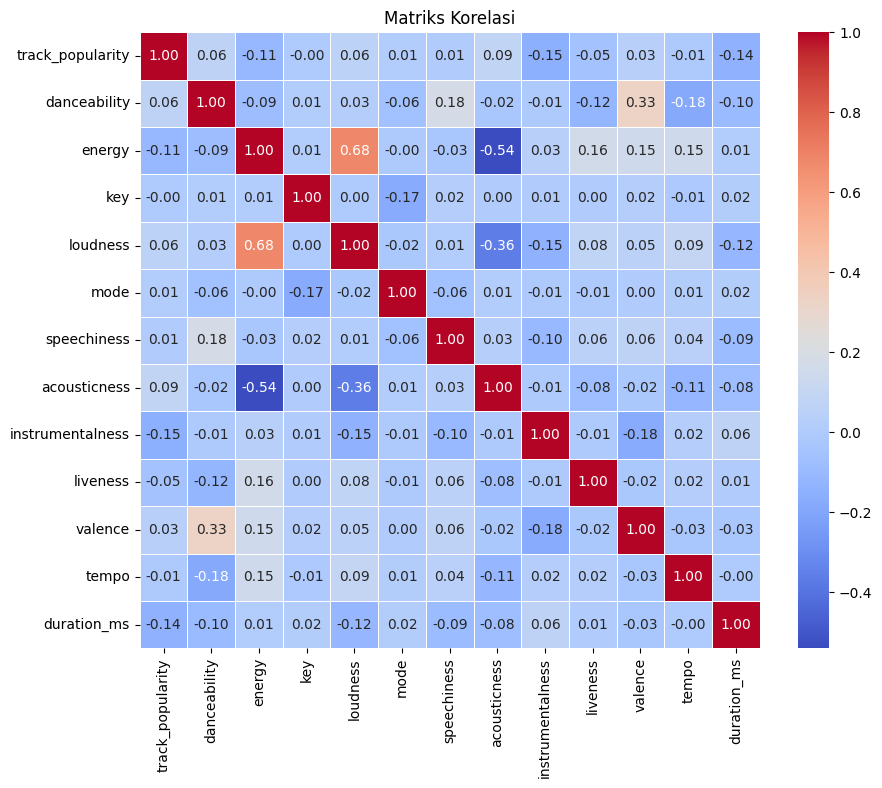

In [ ]:
# Mengonversi data string
df_spotify_numeric = df_spotify.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = df_spotify_numeric.corr()

# Menampilkan matriks korelasi menggunakan heatmap (seaborn)
plt.figure(figsize=(10, 8)) #membuat objek gambar dengan ukuran tertentu sebelum melakukan plotting.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) #membuat heatmap dari matriks korelasi dengan menampilkan nilai korelasi di dalam setiap sel
plt.title("Matriks Korelasi") #Menambahkan judul pada plot yg sedang dibuat
plt.show()

In [ ]:
from scipy.stats import zscore #import zscore

# Menghitung z-score untuk setiap data point pada kolom 'tempo'
z_scores = zscore(df['tempo'])

# Menentukan batas z-score
threshold = 2
df_cleaned = df[(z_scores >= -threshold) & (z_scores <= threshold)] # menghilangkan outlier atau nilai ekstrem dari kumpulan data.


<Axes: xlabel='tempo'>

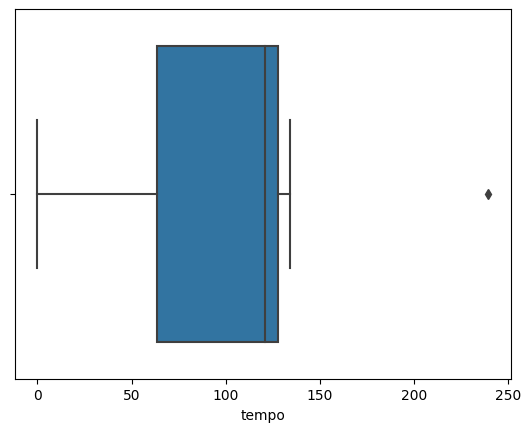

In [ ]:
# cek outlier yang sudah dihapus
sns.boxplot(x = 'tempo', data = df_cleaned)

**Distribusi Nilai pada Kolom Klasterisasi**

In [ ]:
# Melihat distribusi nilai pada kolom klasterisasi
label_distribution = df_spotify['playlist_genre'].value_counts()
label_distribution

edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: playlist_genre, dtype: int64

**Visualisasi distribusi dan tren dalam dataset**

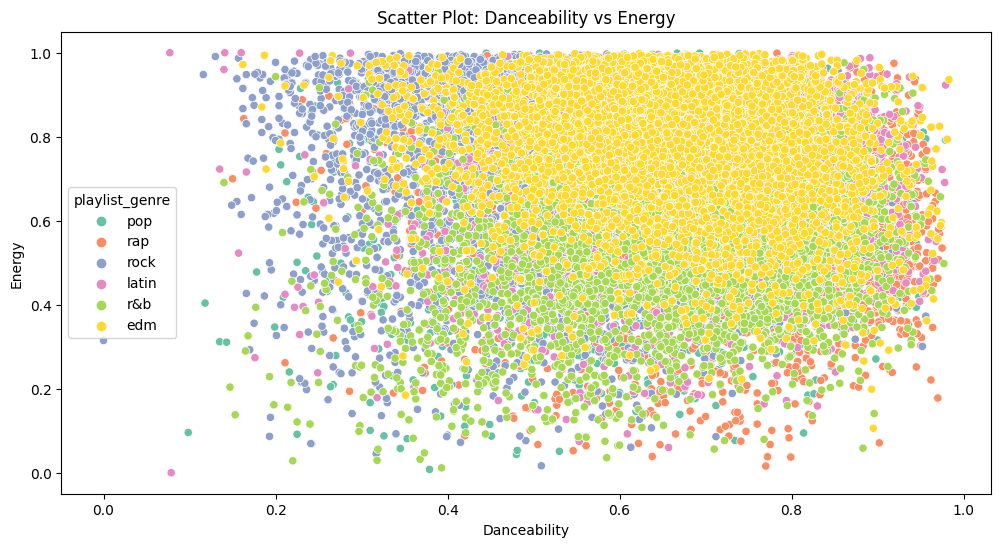

In [ ]:
# Memvisualisasikan distribusi dan tren dalam dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Memvisualisasikan scatter plot dua atribut dengan warna berbeda untuk setiap label
sns.scatterplot(x='danceability', y='energy', hue='playlist_genre', palette='Set2', data=df_spotify)
plt.title('Scatter Plot: Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

## **B. Data Preparation**

**Normalisasi Data**

In [ ]:
#mengimport preprocessing
from sklearn import preprocessing

numeric_cols = df_spotify.select_dtypes(include = [np.number]).columns

X = df_spotify[numeric_cols]

# Handle nilai-nilai yang tidak valid atau non-numeric (misalnya, mengganti NaN dengan nilai tertentu)
X.fillna(0, inplace=True)

<ipython-input-105-964e1f153453>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [ ]:
# Normalisasi data menggunakan fungsi normalize dari scikit-learn
x = df_spotify.drop(["track_name","track_artist","track_album_id","track_album_name","track_album_release_date",
               "playlist_name","playlist_id","playlist_genre","playlist_subgenre"  ], axis = 1) #menghapus kolom yang tidak diperlukan
x_norm = preprocessing.normalize(X) #normalisasi data

## **C. Klusterisasi**

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

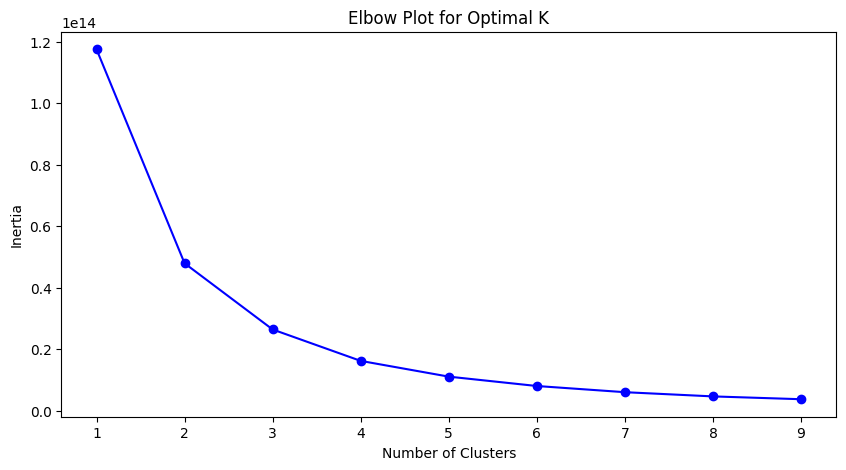

In [ ]:
# Import library yang dibutuhkan
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fungsi untuk menghitung inertia untuk berbagai jumlah klaster
def elbow_plot(data, clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)

    # Plot elbow plot
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, clusters), inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for Optimal K')
    plt.show()

# Menerapkan metode elbow untuk mencari jumlah klaster yang optimal
elbow_plot(df_spotify[numeric_cols], 10)

In [ ]:
# membuat algoritma untuk clustering k-means
algorithm = KMeans(n_clusters = 2, init = 'k-means++', random_state = 125)
# algoritma k-means dengan jumlah cluster 3 dan random state 125
algorithm.fit(x_norm) #memasukkan data yang telah di normalisasi kedalam fitting algoritma
labels = algorithm.labels_ #membuat label dari algoritma

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='danceability', ylabel='energy'>

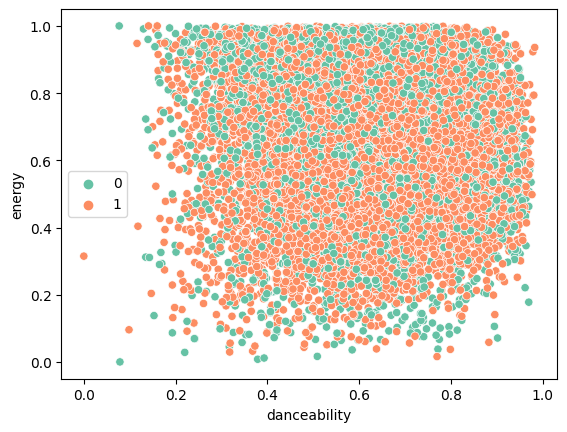

In [ ]:
# membuat plot untuk clustering
sns.scatterplot(data = x, x = 'danceability', y = 'energy', hue = labels, palette = 'Set2')

In [ ]:
# statistik cluster
cluster_stats = x.groupby(labels).mean()
print(cluster_stats)

   track_popularity  danceability    energy       key  loudness      mode  \
0         49.649836      0.648654  0.709613  5.332729 -6.355122  0.562317   
1         38.565774      0.658228  0.692624  5.397233 -6.918194  0.567562   

   speechiness  acousticness  instrumentalness  liveness   valence  \
0     0.119662      0.173715          0.090004  0.194160  0.505659   
1     0.100200      0.176216          0.081880  0.188004  0.513234   

        tempo    duration_ms  
0  138.996731  183107.151821  
1  111.002686  249080.140914  


<ipython-input-110-dff4ad0fe2fb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = x.groupby(labels).mean()


<Axes: ylabel='energy'>

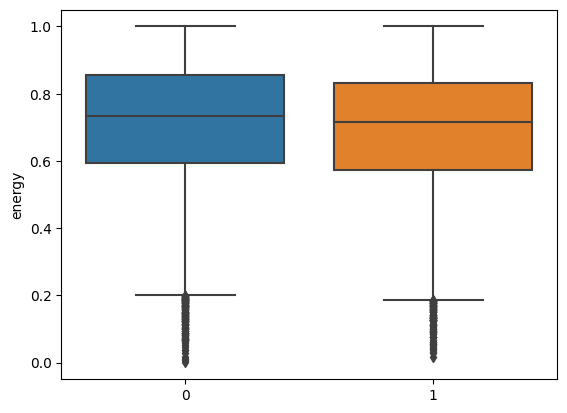

In [ ]:
# menghasilkan visualisasi boxplot
sns.boxplot(x = labels, y = x['energy'])